In [1]:
#     API Alpaca
#     Data cleanup
#     Consumer Discretionary Monte Carlo = XLY
#     Consumer Staples Monte Carlo = XLP
#     SP500 GROWTH Monte Carlo = SGX


In [2]:
#import libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json
from pathlib import Path
import alpaca_trade_api as tradeapi
import requests
import os
import seaborn as sns
from dotenv import load_dotenv

%matplotlib inline

In [3]:
# Load .env enviroment variables

load_dotenv()

# Set Alpaca API key and secret
Api_key = os.getenv("Api_key")
Secret_key = os.getenv("Secret_key")

api = tradeapi.REST(Api_key, Secret_key, api_version='v2')
type(Api_key)


str

In [4]:
#Use alpha vantage to get historic quotes for XLY,XLP,IVW, and SPY. This goes back 20 years.

xly_df = api.alpha_vantage.historic_quotes('XLY', adjusted=True, output_format='pandas')
xly_df.head()

xlp_df = api.alpha_vantage.historic_quotes('XLP', adjusted=True, output_format='pandas')
#xlp_df.tail()

ivw_df = api.alpha_vantage.historic_quotes('IVW', adjusted=True, output_format='pandas')
#ivw_df.head()

spy_df = api.alpha_vantage.historic_quotes('SPY', adjusted=True, output_format='pandas')


In [5]:
spy_df.head()


,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2020-05-01,285.31,290.6572,281.52,282.79,282.79,125045778.0,0.0,1.0
2020-04-30,291.71,293.3239,288.59,290.48,290.48,121537052.0,0.0,1.0
2020-04-29,291.53,294.8800,290.41,293.21,293.21,118066585.0,0.0,1.0
2020-04-28,291.02,291.4000,285.40,285.73,285.73,104797847.0,0.0,1.0
2020-04-27,285.12,288.2700,284.62,287.05,287.05,77516422.0,0.0,1.0


In [6]:
#DATA CLEANUP

#Select the one column we need,  "adjusted close", and drop the others

xly_df = xly_df['5. adjusted close']
xly_df.head()

xlp_df = xlp_df['5. adjusted close']
xlp_df.head()

ivw_df = ivw_df['5. adjusted close']
ivw_df.head()

spy_df = spy_df['5. adjusted close']
spy_df.head()

#Use concat to put the data in one dataframe
concat_df = pd.concat([xly_df, xlp_df, ivw_df, spy_df], axis = "columns", join = "inner")
concat_df.head()
    

,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close
date,,,,
2020-05-01,112.24,57.62,183.70,282.79
2020-04-30,116.60,58.26,188.57,290.48
2020-04-29,117.33,58.96,188.89,293.21
2020-04-28,114.80,59.21,183.09,285.73
2020-04-27,114.35,58.88,185.34,287.05


In [7]:
#print column names
print(concat_df.columns)


Index(['5. adjusted close', '5. adjusted close', '5. adjusted close',
       '5. adjusted close'],
      dtype='object')


In [8]:
#Change column names to avoid confusion
columns = ['XLY close', 'XLP close', 'IVW close', 'SPY close']
concat_df.columns = columns
concat_df.head()


,XLY close,XLP close,IVW close,SPY close
date,,,,
2020-05-01,112.24,57.62,183.70,282.79
2020-04-30,116.60,58.26,188.57,290.48
2020-04-29,117.33,58.96,188.89,293.21
2020-04-28,114.80,59.21,183.09,285.73
2020-04-27,114.35,58.88,185.34,287.05


In [9]:
#Sort earliest to latest so that .pct_change() function works right.

concat_df.sort_index(inplace=True, ascending=True)
concat_df.head()

,XLY close,XLP close,IVW close,SPY close
date,,,,
2000-05-26,20.4125,15.2972,61.6055,94.5076
2000-05-30,20.5678,15.2091,64.1619,97.5894
2000-05-31,21.0571,15.0643,64.1619,97.8034
2000-06-01,21.2125,15.1021,64.9608,99.5155
2000-06-02,21.7950,14.5798,67.0988,101.2489


In [10]:
returns_df = concat_df.pct_change()
returns_df

,XLY close,XLP close,IVW close,SPY close
date,,,,
2000-05-26,NaN,NaN,NaN,NaN
2000-05-30,0.007608,-0.005759,0.041496,0.032609
2000-05-31,0.023790,-0.009521,0.000000,0.002193
2000-06-01,0.007380,0.002509,0.012451,0.017506
2000-06-02,0.027460,-0.034585,0.032912,0.017418
...,...,...,...,...
2020-04-27,0.018708,0.002896,0.010027,0.014418
2020-04-28,0.003935,0.005605,-0.012140,-0.004599
2020-04-29,0.022038,-0.004222,0.031678,0.026179


In [11]:
#check for nulls

returns_df.isnull().sum()

XLY close    1
XLP close    1
IVW close    1
SPY close    1
dtype: int64

In [12]:
# Drop nulls
returns_df.dropna(inplace=True)

#count nulls again
returns_df.isnull().sum()

XLY close    0
XLP close    0
IVW close    0
SPY close    0
dtype: int64

In [13]:
# Checking for duplicate rows
returns_df.duplicated()

date
2000-05-30    False
2000-05-31    False
2000-06-01    False
2000-06-02    False
2000-06-05    False
              ...  
2020-04-27    False
2020-04-28    False
2020-04-29    False
2020-04-30    False
2020-05-01    False
Length: 5013, dtype: bool

In [14]:
# drop duplicates
returns_df.drop_duplicates(inplace=True)
returns_df.head()

,XLY close,XLP close,IVW close,SPY close
date,,,,
2000-05-30,0.007608,-0.005759,0.041496,0.032609
2000-05-31,0.023790,-0.009521,0.000000,0.002193
2000-06-01,0.007380,0.002509,0.012451,0.017506
2000-06-02,0.027460,-0.034585,0.032912,0.017418
2000-06-05,-0.005345,-0.001296,-0.004990,-0.004861


In [15]:
# drop close columns to create dataframe for daily returns
returns_df.rename(columns={'XLY close': 'XLY return',
                           'XLP close': 'XLP return',
                           'IVW close': 'IVW return',
                           'SPY close': 'SP500 return'},
                  inplace=True)
returns_df.head()

,XLY return,XLP return,IVW return,SP500 return
date,,,,
2000-05-30,0.007608,-0.005759,0.041496,0.032609
2000-05-31,0.023790,-0.009521,0.000000,0.002193
2000-06-01,0.007380,0.002509,0.012451,0.017506
2000-06-02,0.027460,-0.034585,0.032912,0.017418
2000-06-05,-0.005345,-0.001296,-0.004990,-0.004861


In [19]:

# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns_xly = (1 + returns_df['XLY return']).cumprod()
cumulative_returns_xlp = (1 + returns_df['XLP return']).cumprod()
cumulative_returns_ivw = (1 + returns_df['IVW return']).cumprod()
cumulative_returns_spy = (1 + returns_df['SP500 return']).cumprod()


In [20]:
cumulative_returns_xly.head()

date
2000-05-30    1.007608
2000-05-31    1.031579
2000-06-01    1.039192
2000-06-02    1.067728
2000-06-05    1.062021
Name: XLY return, dtype: float64

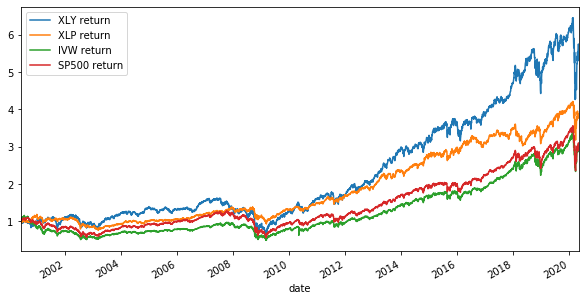

In [21]:
#plot cumulative returns

cumulative_returns_xly.plot(figsize=(10,5), legend=True)
cumulative_returns_xlp.plot(figsize=(10,5), legend=True)
cumulative_returns_ivw.plot(figsize=(10,5), legend=True)
cumulative_returns_spy.plot(figsize=(10,5), legend=True)

In [22]:
#calculate value of standard deviation of daily returns
#use the std function to calculate the standard deviation of daily returns for XLY, XLP, & SGX

std_xly_daily_returns = returns_df['XLY return'].std()
print (f'Consumer Discretionary standard deviation is {std_xly_daily_returns}')

std_xlp_daily_returns = returns_df['XLP return'].std()
print (f'Consumer Staples standard deviation is {std_xlp_daily_returns}')

std_ivw_daily_returns = returns_df['IVW return'].std()
print (f'S&P 500 Growth standard deviation is {std_ivw_daily_returns}')

std_spy_daily_returns = returns_df['SP500 return'].std()
print (f'S&P 500 standard deviation is {std_spy_daily_returns})')


Consumer Discretionary standard deviation is 0.014070234125883442
Consumer Staples standard deviation is 0.009523077075917048
S&P 500 Growth standard deviation is 0.013299957044347598
S&P 500 standard deviation is 0.012425981029282685)


In [23]:
# Calculate the annualized standard deviation (252 trading days) for each sector
annual_xly_std = std_xly_daily_returns * np.sqrt(252)
annual_xly_std

annual_xlp_std = std_xlp_daily_returns * np.sqrt(252)
annual_xlp_std

annual_ivw_std = std_ivw_daily_returns * np.sqrt(252)
annual_ivw_std

annual_spy_std = std_spy_daily_returns * np.sqrt(252)
annual_spy_std

0.19725633359693037

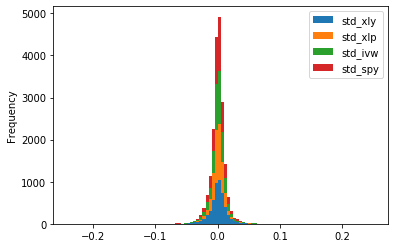

In [24]:
#Plot

sectors_std = pd.DataFrame({
    "std_xly": returns_df['XLY return'],
    "std_xlp": returns_df['XLP return'],
    "std_ivw": returns_df['IVW return'],
    "std_spy": returns_df['SP500 return']
})

sectors_std.plot.hist(stacked=True, bins=100)

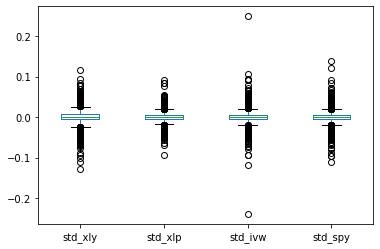

In [25]:
sectors_std.plot.box()


In [26]:
# Calculate Sharpe Ratios for the sectors

XLY_sharpe = (returns_df['XLY return'].mean() * 252) / (returns_df['XLY return'].std() * np.sqrt(252))

XLP_sharpe = (returns_df['XLP return'].mean() * 252) / (returns_df['XLP return'].std() * np.sqrt(252))

IVW_sharpe = (returns_df['IVW return'].mean() * 252) / (returns_df['IVW return'].std() * np.sqrt(252))

SPY_sharpe = (returns_df['SP500 return'].mean() * 252) / (returns_df['SP500 return'].std() * np.sqrt(252))

print(f" XLY: {XLY_sharpe}, XLP: {XLP_sharpe}, IVW:{IVW_sharpe}, SPY:{SPY_sharpe}")




 XLY: 0.4955995473665896, XLP: 0.516631849698764, IVW:0.36610999593867377, SPY:0.37802120016801444


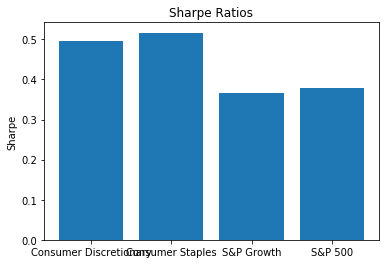

In [29]:
#Plot the sharpe ratios

objects = ('Consumer Discretionary', 'Consumer Staples', 'S&P Growth', 'S&P 500')
y_pos = np.arange(len(objects))
sharpe = [XLY_sharpe,XLP_sharpe,IVW_sharpe, SPY_sharpe]

plt.bar(y_pos, sharpe, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Sharpe')
plt.title('Sharpe Ratios')

plt.show()

In [30]:
# Drop nulls on Returns
returns_df.dropna(inplace=True)

#count nulls 
returns_df.isnull().sum()

XLY return      0
XLP return      0
IVW return      0
SP500 return    0
dtype: int64

In [31]:
#Check correlation

sector_correlation = returns_df.corr()
sector_correlation

,XLY return,XLP return,IVW return,SP500 return
XLY return,1.000000,0.632985,0.796894,0.864058
XLP return,0.632985,1.000000,0.659355,0.716253
IVW return,0.796894,0.659355,1.000000,0.896600
SP500 return,0.864058,0.716253,0.896600,1.000000


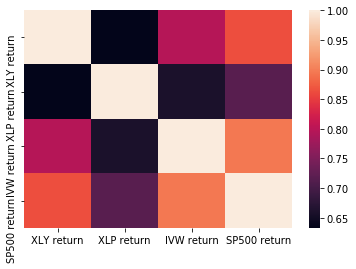

In [32]:
# Heapmap to visualize sector correlation
sns.heatmap(sector_correlation)

In [33]:
#BETA CALCULATION CONSUMER DISCRETIONARY Sector and S&P 500

# Calculate covariance of XLY vs. S&P 500
xly_covariance = returns_df['XLY return'].cov(returns_df['SP500 return'])
xly_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['SP500 return'].var()
variance

# Calculate beta of Consumer Discretionary Sector
xly_beta = xly_covariance / variance
xly_beta

0.9783929032648041

In [34]:
#BETA CALCULATION CONSUMER STAPLES Sector and S&P 500

# Calculate covariance of XLP vs. S&P 500
xlp_covariance = returns_df['XLP return'].cov(returns_df['SP500 return'])
xlp_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['SP500 return'].var()
variance

# Calculate beta of Consumer Staples Sector
xlp_beta = xlp_covariance / variance
xlp_beta

0.548925338084802

In [35]:
#BETA CALCULATION SP Growth Sector and S&P 500

# Calculate covariance of IVW vs. S&P 500
ivw_covariance = returns_df['IVW return'].cov(returns_df['SP500 return'])
ivw_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['SP500 return'].var()
variance

# Calculate beta of SP Growth Sector
ivw_beta = ivw_covariance / variance
ivw_beta

0.959662288956733

A 10,000 investment in the Consumer Discretionary Sector would have increased to 54985.915492957756


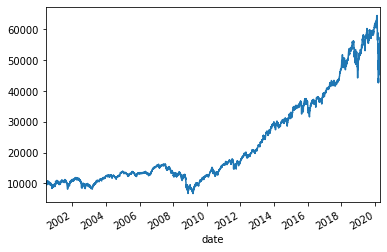

In [42]:
# Plot the monetary returns of Consumer Discretionary Sector 
initial_investment = 10000
cumulative_profit_xly = initial_investment * cumulative_returns_xly
print(f'A 10,000 investment in the Consumer Discretionary Sector would have increased to {cumulative_profit_xly[-1]}')
cumulative_profit_xly.plot()

A 10,000 investment in the Consumer Staples Sector would have increased to 37667.02403054126


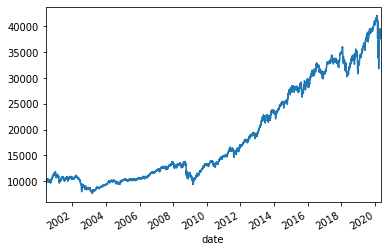

In [45]:
# Plot the monetary returns of Consumer Staples Sector 
initial_investment = 10000
cumulative_profit_xlp = initial_investment * cumulative_returns_xlp
print(f'A 10,000 investment in the Consumer Staples Sector would have increased to {cumulative_profit_xlp[-1]}')
cumulative_profit_xlp.plot()

A 10,000 investment in the SP Growth Sector would have increased to 29818.766181590974


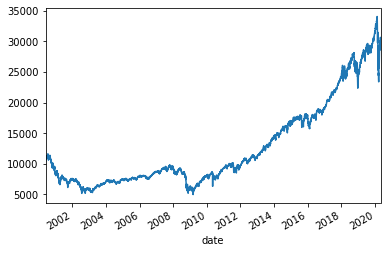

In [47]:
# Plot the monetary returns of SP Growth Sector 
initial_investment = 10000
cumulative_profit_ivw = initial_investment * cumulative_returns_ivw
print(f'A 10,000 investment in the SP Growth Sector would have increased to {cumulative_profit_ivw[-1]}')
cumulative_profit_ivw.plot()

In [48]:
#START MONTE CARLO ANALYSIS (XLY: Consumer Discretionary)

#check concat_df
returns_df.head()

,XLY return,XLP return,IVW return,SP500 return
date,,,,
2000-05-30,0.007608,-0.005759,0.041496,0.032609
2000-05-31,0.023790,-0.009521,0.000000,0.002193
2000-06-01,0.007380,0.002509,0.012451,0.017506
2000-06-02,0.027460,-0.034585,0.032912,0.017418
2000-06-05,-0.005345,-0.001296,-0.004990,-0.004861


In [50]:
#calculate average of daily returns
avg_xly_daily_returns = returns_df['XLY return'].mean()
avg_xly_daily_returns

avg_xlp_daily_returns = returns_df['XLP return'].mean()
avg_xlp_daily_returns

avg_ivw_daily_returns = returns_df['IVW return'].mean()
avg_ivw_daily_returns

avg_spy_daily_returns = returns_df['SP500 return'].mean()
avg_spy_daily_returns


0.00029590109510735656

In [51]:
#Check datatypes

returns_df.dtypes


XLY return      float64
XLP return      float64
IVW return      float64
SP500 return    float64
dtype: object

In [98]:
#check counts
returns_df.count()

XLY return      5013
XLP return      5013
IVW return      5013
SP500 return    5013
dtype: int64

In [99]:
#use describe to explore data
returns_df.describe()

,XLY return,XLP return,IVW return,SP500 return
count,5013.000000,5013.000000,5013.000000,5013.000000
mean,0.000439,0.000310,0.000307,0.000296
std,0.014070,0.009523,0.013300,0.012426
min,-0.126686,-0.093956,-0.238912,-0.109423
25%,-0.005737,-0.004184,-0.004663,-0.004512
50%,0.000820,0.000442,0.000694,0.000655
75%,0.007112,0.005134,0.005807,0.005766
max,0.116572,0.091354,0.248785,0.139609


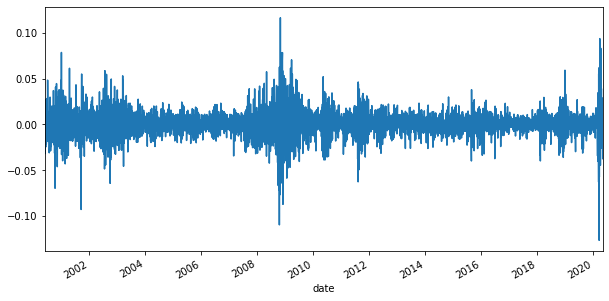

In [100]:
#plot daily returns of XLY

returns_df['XLY return'].plot(figsize=(10,5))

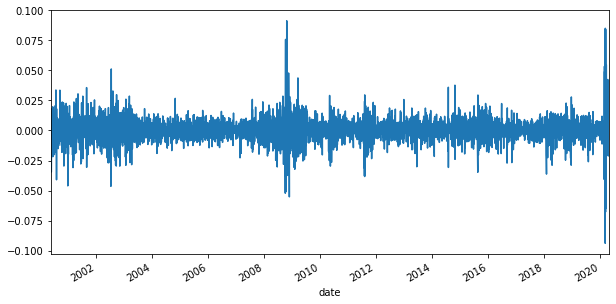

In [101]:
#plot daily returns of XLP

returns_df['XLP return'].plot(figsize=(10,5))

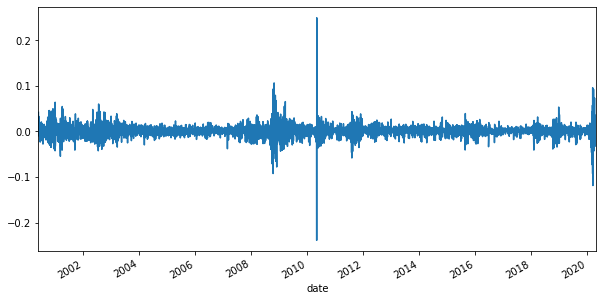

In [102]:
#plot daily returns of IVW

returns_df['IVW return'].plot(figsize=(10,5))

In [104]:
#need to check on dividend

In [52]:
#START MONTE CARLO ANALYSIS (XLY)
#Set number of simulations
num_simulations = 1000

# Set number of trading days and get last closing price of XLY from DataFrame

num_trading_days = 30
xly_last_price = xly_df[1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_XLY_df = pd.DataFrame()


In [53]:
## Run the simulation `1000` times for XLY
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price of XLY
    simulated_XLY_prices = [xly_last_price]
    simulated_XLY_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price = simulated_XLY_prices[-1] * (1 + np.random.normal(avg_xly_daily_returns, std_xly_daily_returns))
        # Append the simulated price to the list
        simulated_XLY_prices.append(simulated_price)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_XLY_df[f"Simulation {n+1}"] = pd.Series(simulated_XLY_prices)

simulated_prices_XLY_df.head()




,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,...,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000,116.600000
1,113.892682,116.863110,115.148648,118.394236,116.915220,113.624150,118.633389,116.759012,117.670199,117.087018,...,116.869362,117.118310,114.499913,116.410673,118.750672,117.794552,116.236366,114.244080,117.753031,116.119587
2,114.981331,116.993145,114.135489,117.188621,117.339828,111.411818,120.127759,119.577590,114.000060,111.552071,...,114.737744,115.889471,114.376449,117.168093,119.266915,118.916185,115.518595,115.350931,118.443592,114.053530
3,115.399366,117.651015,113.132387,115.654908,118.856258,112.015074,117.915039,118.812238,114.831409,110.204080,...,118.081126,117.578016,114.312166,116.517571,117.593655,117.235690,115.119911,116.450387,117.388171,114.490706
4,117.704727,116.253537,113.999203,116.494901,119.327866,107.771387,119.544839,118.340050,115.112344,110.506772,...,117.374982,118.486805,114.696269,115.539927,117.468358,116.268284,113.979064,116.601956,119.257836,118.955206


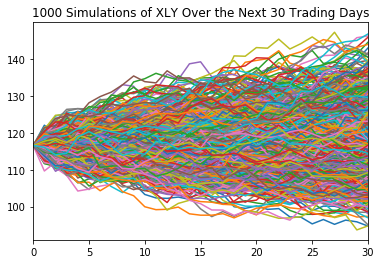

In [54]:
#plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of XLY Over the Next 30 Trading Days"
simulated_prices_XLY_df.plot(legend=None, title=plot_title)


In [55]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_XLY = simulated_prices_XLY_df.iloc[-1, :]
simulated_ending_prices_XLY.head()


Simulation 1    118.306409
Simulation 2    136.570027
Simulation 3    101.874334
Simulation 4    103.589403
Simulation 5    126.268689
Name: 30, dtype: float64

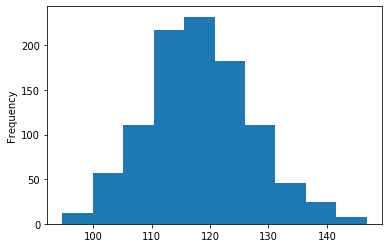

In [56]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_XLY.plot(kind='hist')


In [57]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_XLY.quantile(q=[0.025, 0.975])
confidence_interval


0.025    101.870540
0.975    136.967406
Name: 30, dtype: float64

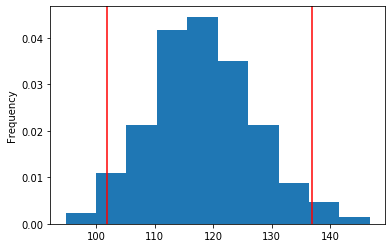

In [58]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_XLY.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [60]:
# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - xly_last_price) / xly_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - xly_last_price) / xly_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in Consumer Discretionary"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")


There is a 95% chance that an initial investment of $10,000 in Consumer Discretionary over the next 30 trading days will end within in the range of $8736.75 and $11746.78


In [61]:
#START MONTE CARLO ANALYSIS Consumer Staples

#Set number of simulations
num_simulations = 1000

# Set number of trading days and get last closing price of XLP from DataFrame

num_trading_days = 30
xlp_last_price = xlp_df[1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_XLP_df = pd.DataFrame()


In [62]:
## Run the simulation `1000` times for XLP: Consumer Staples
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price of XLP
    simulated_XLP_prices = [xlp_last_price]
    simulated_XLP_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price = simulated_XLP_prices[-1] * (1 + np.random.normal(avg_xlp_daily_returns, std_xlp_daily_returns))
        # Append the simulated price to the list
        simulated_XLP_prices.append(simulated_price)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_XLP_df[f"Simulation {n+1}"] = pd.Series(simulated_XLP_prices)

simulated_prices_XLP_df.head()


,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,...,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000,58.260000
1,58.347756,58.512858,58.186712,57.202004,58.349496,58.245908,58.735477,57.992100,58.190514,58.713611,...,57.449191,58.738296,58.653740,58.178440,57.389189,58.143469,58.687128,58.779483,58.428282,57.732232
2,60.013561,59.110390,57.468715,57.904268,58.515807,58.974491,59.244145,57.979729,58.665105,59.482023,...,57.681717,58.918096,58.936342,58.210410,57.341178,58.531961,59.528669,58.813123,59.541629,57.928048
3,60.000555,58.672880,57.148434,57.766549,58.569033,58.484988,59.989512,57.664031,58.714146,58.971854,...,58.351974,59.845996,59.171379,58.397586,57.604856,59.090240,59.898192,58.040483,59.789752,57.794198
4,60.510090,58.418877,57.119084,57.647182,59.513399,58.381590,59.686409,57.587137,58.784892,59.403912,...,58.353816,59.747124,59.495936,58.674569,59.430371,58.231847,58.928176,58.178907,60.060566,57.519838


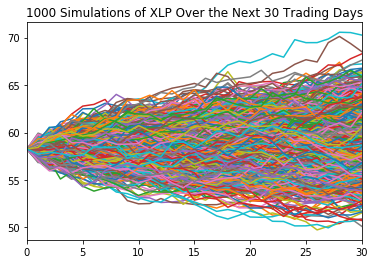

In [63]:
#Plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of XLP Over the Next 30 Trading Days"
simulated_prices_XLP_df.plot(legend=None, title=plot_title)


In [66]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_XLP = simulated_prices_XLP_df.iloc[-1, :]
simulated_ending_prices_XLP.head()


Simulation 1    61.054903
Simulation 2    55.018375
Simulation 3    56.273885
Simulation 4    57.583006
Simulation 5    54.502450
Name: 30, dtype: float64

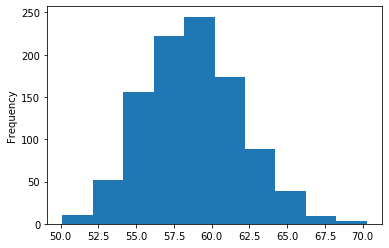

In [67]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_XLP.plot(kind='hist')


In [68]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_XLP.quantile(q=[0.025, 0.975])
confidence_interval

0.025    52.903236
0.975    65.470701
Name: 30, dtype: float64

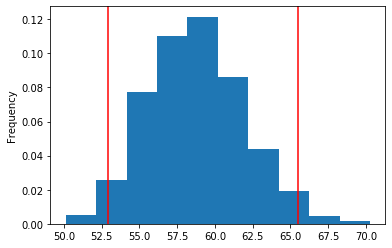

In [71]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_XLP.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')


In [72]:

# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - xlp_last_price) / xlp_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - xlp_last_price) / xlp_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in the Consumer Staples sector"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")

There is a 95% chance that an initial investment of $10,000 in the Consumer Staples sector over the next 30 trading days will end within in the range of $9080.54 and $11237.68


In [73]:
#Set up Monte Carlo Simulation for SP Growth: IVW

#Set number of simulations

num_simulations = 1000

# Set number of trading days and get last closing price of IVW from DataFrame

num_trading_days = 30
ivw_last_price = ivw_df[1]

# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_prices_ivw_df = pd.DataFrame()

In [74]:
# Run the simulation `1000` times
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price of IVW
    simulated_ivw_prices = [ivw_last_price]
    simulated_ivw_prices

    # Simulate the returns for 30 days
    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price_ivw = simulated_ivw_prices[-1] * (1 + np.random.normal(avg_ivw_daily_returns, std_ivw_daily_returns))
        # Append the simulated price to the list
        simulated_ivw_prices.append(simulated_price_ivw)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_ivw_df[f"Simulation {n+1}"] = pd.Series(simulated_ivw_prices)

simulated_prices_ivw_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,188.570000,188.570000,188.570000,188.570000,188.570000,188.570000,188.570000,188.570000,188.570000,188.570000,...,188.570000,188.570000,188.570000,188.570000,188.570000,188.570000,188.570000,188.570000,188.570000,188.570000
1,189.883737,188.059722,187.803427,188.744250,186.068415,187.427868,187.829265,186.947405,185.575374,190.236175,...,185.595774,187.752093,187.384059,190.303496,185.094781,187.728944,186.848116,188.800472,188.209182,191.572155
2,187.206879,183.337382,184.573512,189.064625,186.353917,188.844058,189.641367,188.860004,185.561870,191.515057,...,186.030166,189.856423,191.430674,189.309241,183.644393,187.673821,184.465345,192.178526,191.490368,191.542167
3,186.902158,189.199699,184.484303,187.888856,181.954744,188.450118,193.921147,188.176163,181.109186,191.052654,...,189.471253,183.127517,191.162158,191.142779,187.502639,182.666695,184.428321,192.497470,191.206596,191.578823
4,189.619334,189.308095,186.458316,189.873738,182.468095,190.328873,195.475137,185.372867,180.447050,193.834669,...,186.962312,177.295177,191.448981,189.847209,184.707591,184.485776,184.110851,191.179857,192.293299,192.647924


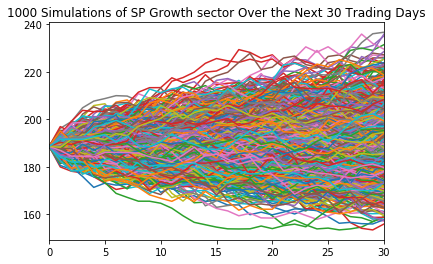

In [75]:
#Plot 1000 simulations of 30 trading days
plot_title = f"{n+1} Simulations of SP Growth sector Over the Next 30 Trading Days"
simulated_prices_ivw_df.plot(legend=None, title=plot_title)


In [76]:
# Select the last row (price of each simulation on the 30th trading day)
simulated_ending_prices_ivw = simulated_prices_ivw_df.iloc[-1, :]
simulated_ending_prices_ivw.head()


Simulation 1    176.296995
Simulation 2    173.971892
Simulation 3    201.946624
Simulation 4    192.392850
Simulation 5    174.685517
Name: 30, dtype: float64

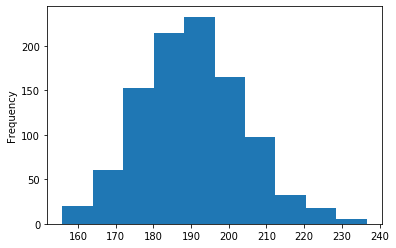

In [78]:
# Plot a frequency distribution of simulated ending prices
simulated_ending_prices_ivw.plot(kind='hist')


In [79]:
# Use `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices_ivw.quantile(q=[0.025, 0.975])
confidence_interval

0.025    164.921739
0.975    219.468390
Name: 30, dtype: float64

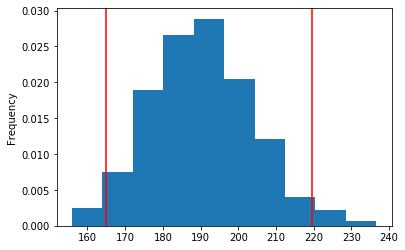

In [80]:
# Create a probability distribution histogram of simulated ending prices
# Mark the 95% confidence interval
plt.figure();
simulated_ending_prices_ivw.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [81]:

# Set initial investment
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - ivw_last_price) / ivw_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - ivw_last_price) / ivw_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in the S&P Growth sector"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")


There is a 95% chance that an initial investment of $10,000 in the S&P Growth sector over the next 30 trading days will end within in the range of $8745.92 and $11638.56
